# PlotGenerator Demo
A demonstration of PlotGenerator.

---

# Import Modules

---

In [190]:
import numpy as np
import gzip
import sys
try:
    from google.colab import drive
    IN_COLAB = True
    print("On Google CoLab, mount cloud-local file, get our code from GitHub.")
    PATH='/content/drive/'
    #drive.mount(PATH,force_remount=True)  # hardly ever need this
    drive.mount(PATH)    # Google will require login credentials
    DATAPATH=PATH+'My Drive/data/'  # must end in "/"
    import requests
    s = requests.get('https://raw.githubusercontent.com/ShepherdCode/Soars2021/master/SimTools/plot_generator.py')
    with open('plot_generator.py', 'w') as f:
      f.write(s.text)
    from plot_generator import *
except:
    print("CoLab not working. On my PC, use relative paths.")
    IN_COLAB = False
    DATAPATH='../data/'  # must end in "/"
    sys.path.append("..") # append parent dir in order to use sibling dirs
    from SimTools.plot_generator import *

On Google CoLab, mount cloud-local file, get our code from GitHub.
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Load or generate data
For this example we will be generating random data.

---

In [191]:
#Box plot data
DIMENSIONS = 10
DATA_A_COUNT = 10
DATA_B_COUNT = 20

boxplot_data_a = np.random.rand(DIMENSIONS, DATA_A_COUNT)
boxplot_data_b = np.random.rand(DIMENSIONS, DATA_B_COUNT)
print(boxplot_data_b.shape)

#PlotGenerator.box_plot() fails on the data above but works on the data below
#This is weird because it is effectively the same data
#The issue has to do with positions. 
#It thinks that data set a will have different positions length than data set b
#This is despite the fact that positions length = DIMENSIONS * NUMBER OF DATA SETS = 10 * 2
boxplot_data_a = np.empty(DIMENSIONS, dtype=object)
boxplot_data_b = np.empty(DIMENSIONS, dtype=object)
for d in range(0, DIMENSIONS):
  boxplot_data_a[d] = np.random.rand(DATA_A_COUNT)
  boxplot_data_b[d] = np.random.rand(DATA_B_COUNT)

print(boxplot_data_b.shape)

(10, 20)
(10,)


In [192]:
#Bar plot data
SIZE = 6
barplot_data_a = np.random.rand(SIZE)
barplot_data_b = np.random.rand(SIZE)
barplot_data_c = np.random.rand(SIZE)

In [193]:
#Histogram data
SIZE = 1000
histogram_data_a = np.random.normal(-1, 1, size=SIZE)
histogram_data_b = np.random.normal(1, 1, size=SIZE)

# Plot the data

---

Set up plot generator

In [194]:
pg = PlotGenerator()
pg.set_text_options(45, 'right', 0, 'center', 12)

Create box plot labels and names

In [195]:

title = 'Example Box Plot'
x_label = 'Subsets/Bins'
y_label = 'y'
x_axis_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] #The length must equal the dimensions of the data sets
y_axis_labels = None
data_set_names = ['A', 'B']

Generate box plot comparing 2 data sets

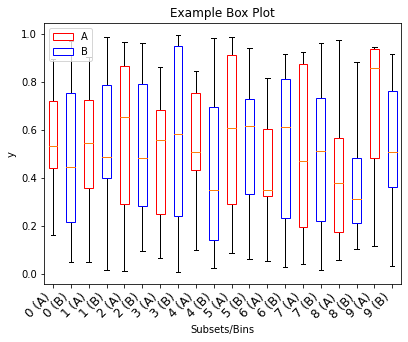

In [196]:
#Box plot
pg.set_text(title, x_label, y_label, x_axis_labels, y_axis_labels)
show_fliers = False #Whether or not outliers should be plotted
pg.box_plot([boxplot_data_a, boxplot_data_b], data_set_names, show_fliers)

Note how for each label on the x-axis, it has the name of the corresponding data set name.

It does this automatically so all you need to provide is the name of each bin/subset and the name of each set.

Create bar plot labels and names

In [197]:
title = 'Example Bar Plot'
x_label = 'Subsets/Bins'
y_label = 'y'
x_axis_labels = ['1', '2', '3', '4', '5', '6']
y_axis_labels = None
data_set_names = ['A', 'B', 'C']

Generate bar plot comparing 3 data sets

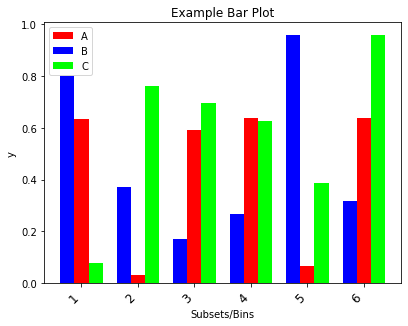

In [198]:
pg.set_text(title, x_label, y_label, x_axis_labels, y_axis_labels)
pg.bar_plot([barplot_data_a, barplot_data_b, barplot_data_c], data_set_names)

Create histogram labels and names

In [199]:
title = 'Example Histogram'
x_label = 'Value'
y_label = 'Count'
data_set_names = ['A', 'B']

Generate histogram comparing 2 data sets

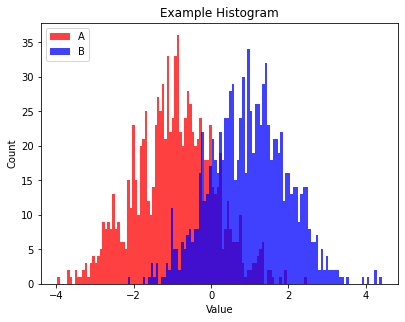

In [200]:
pg.set_text(title, x_label, y_label, None, None)
pg.histogram([histogram_data_a, histogram_data_b], 100, data_set_names)

Here, the two plotted graphs in the histogram use colors with an alpha value less than max so that overlap is shown as a purple color.